# DDA3020 Assignment III

*Chen Zekai 陈泽楷*

*120090539@link.cuhk.edu.cn*

*School of Science and Engineering*

*The Chinese University of Hongkong, Shenzhen*

*2023.04.23*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Data preprocessing

In [2]:
#Read the dataset
df = pd.read_csv("./penguins.csv") 
print("Size of the original dataframe = ", df.shape,"\n")

# Drop incomplete data point
df.dropna(inplace=True)
print("Size of the dataframe after dropping= ", df.shape,"\n")

df.head()

Size of the original dataframe =  (344, 7) 

Size of the dataframe after dropping=  (333, 7) 



species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

## Data statistics

In [3]:
df.describe().columns
#First focus on the numerical data

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [4]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

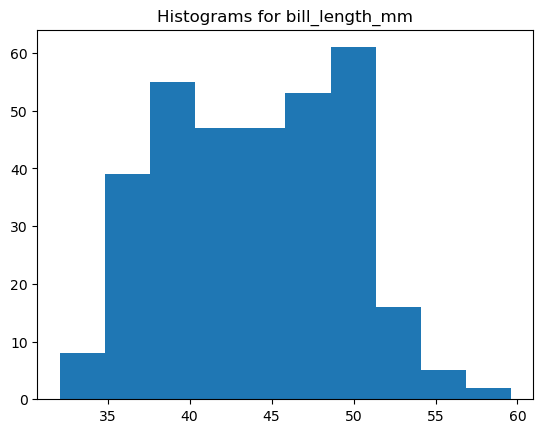

In [5]:
x = np.array(df['bill_length_mm'])
plt.hist(x)
plt.title('Histograms for bill_length_mm')
plt.show() 

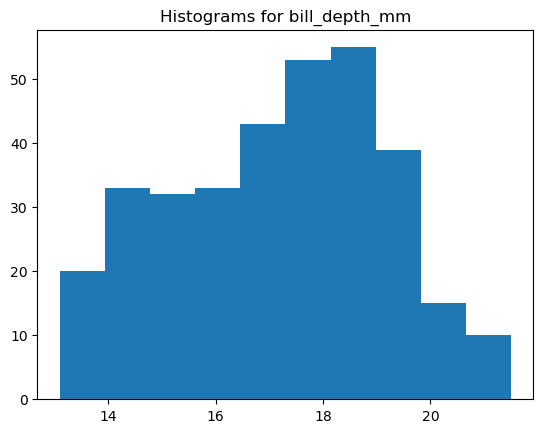

In [6]:
x = np.array(df['bill_depth_mm'])
plt.hist(x)
plt.title('Histograms for bill_depth_mm')
plt.show() 

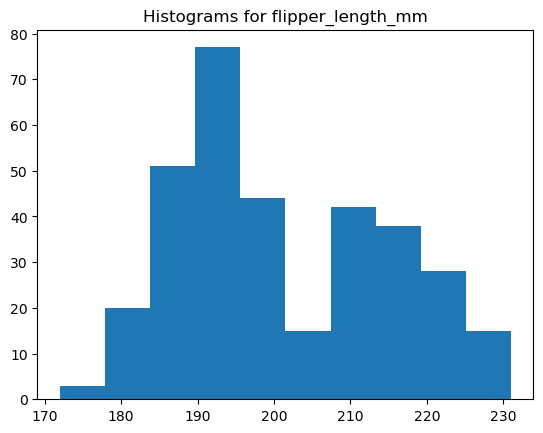

In [7]:
x = np.array(df['flipper_length_mm'])
plt.hist(x)
plt.title('Histograms for flipper_length_mm')
plt.show() 

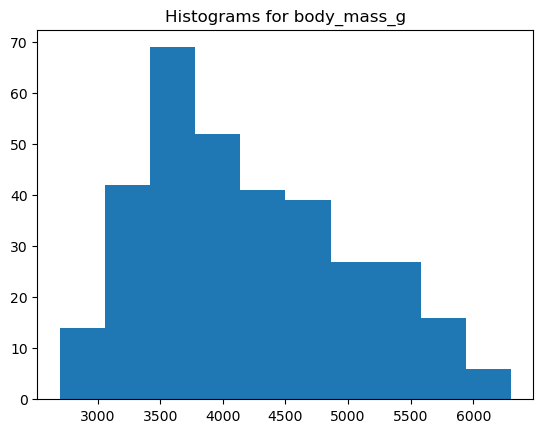

In [8]:
x = np.array(df['body_mass_g'])
plt.hist(x)
plt.title('Histograms for body_mass_g')
plt.show() 

In [9]:
Categorical = ['species','island','sex']
#species is the target value
#They are non-numerical data
df[Categorical].describe()

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  MALE
freq       146     163   168

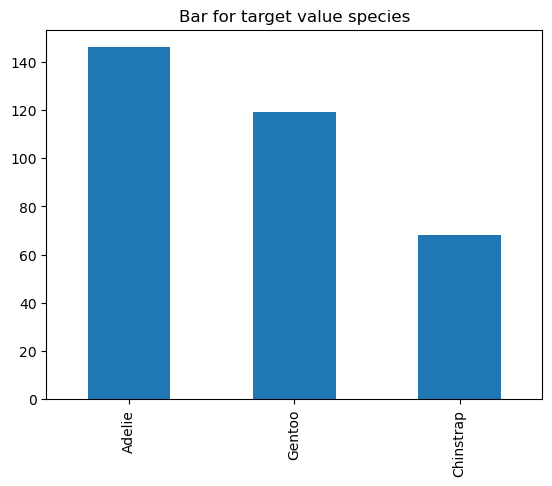

In [10]:
df['species'].value_counts().plot(kind='bar')
plt.title('Bar for target value species')
plt.show() 

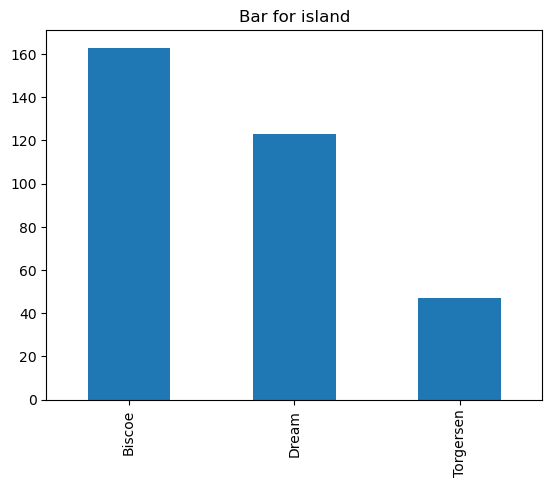

In [11]:
df['island'].value_counts().plot(kind='bar')
plt.title('Bar for island')
plt.show() 

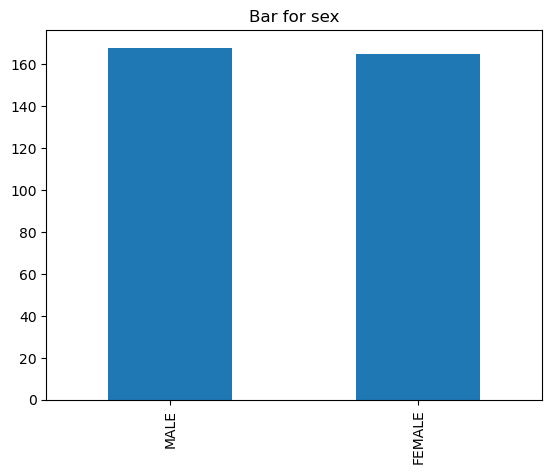

In [12]:
df['sex'].value_counts().plot(kind='bar')
plt.title('Bar for sex')
plt.show() 

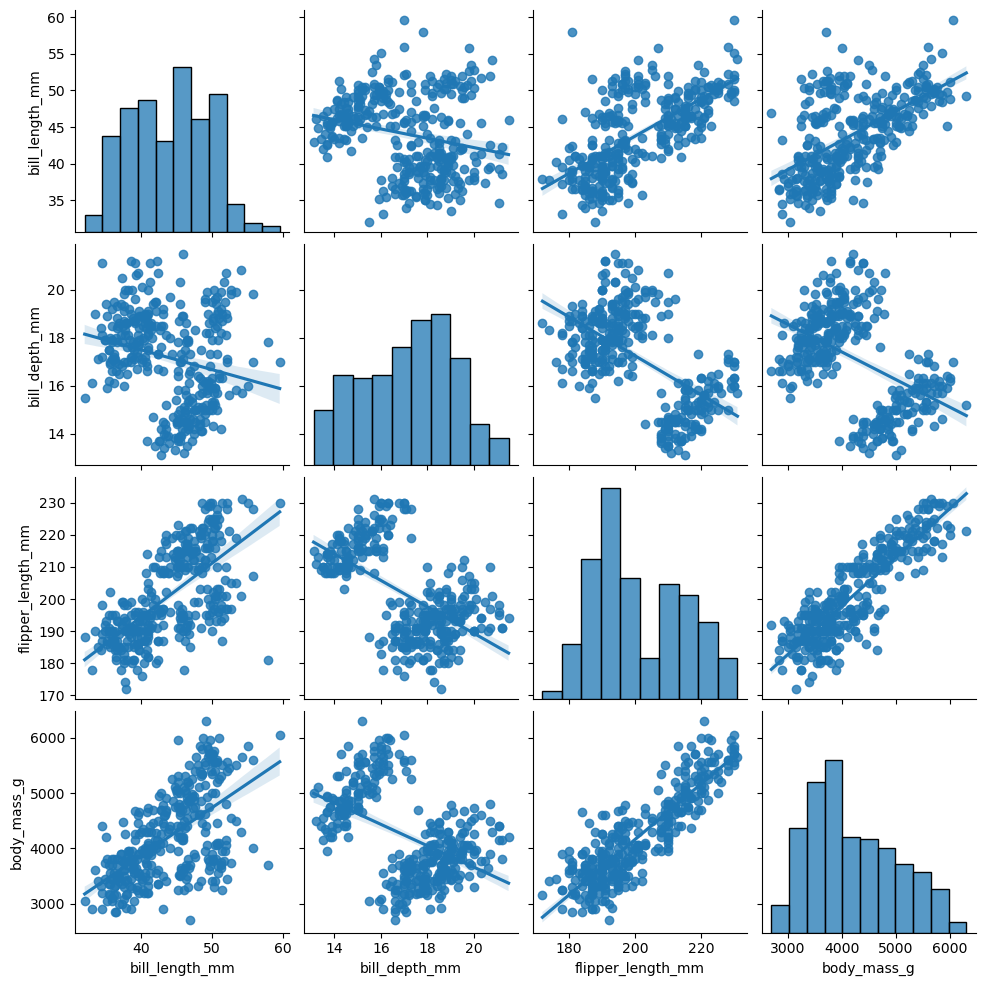

In [13]:
sns.pairplot(df,kind='reg',diag_kind='hist')
plt.show()

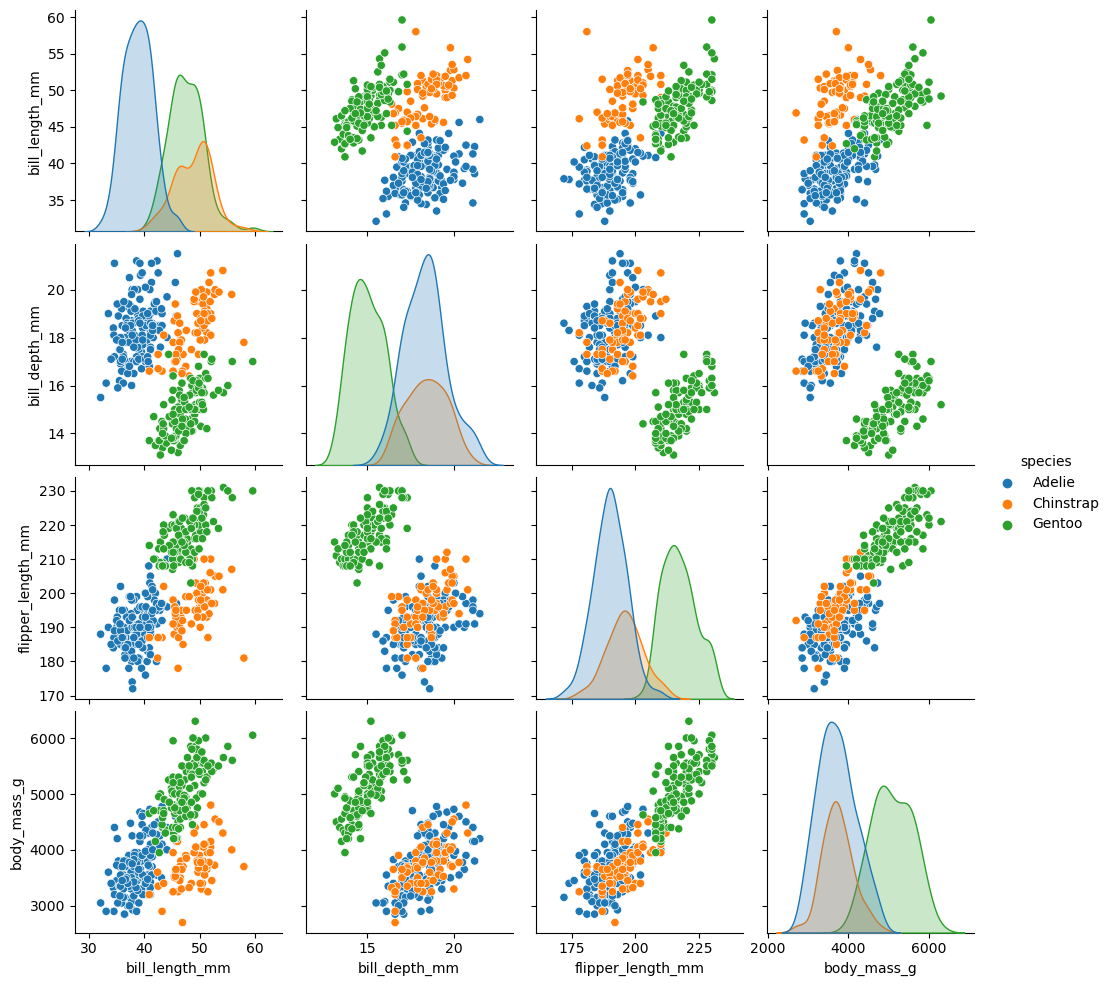

In [14]:
sns.pairplot(df, hue ='species')
plt.show()

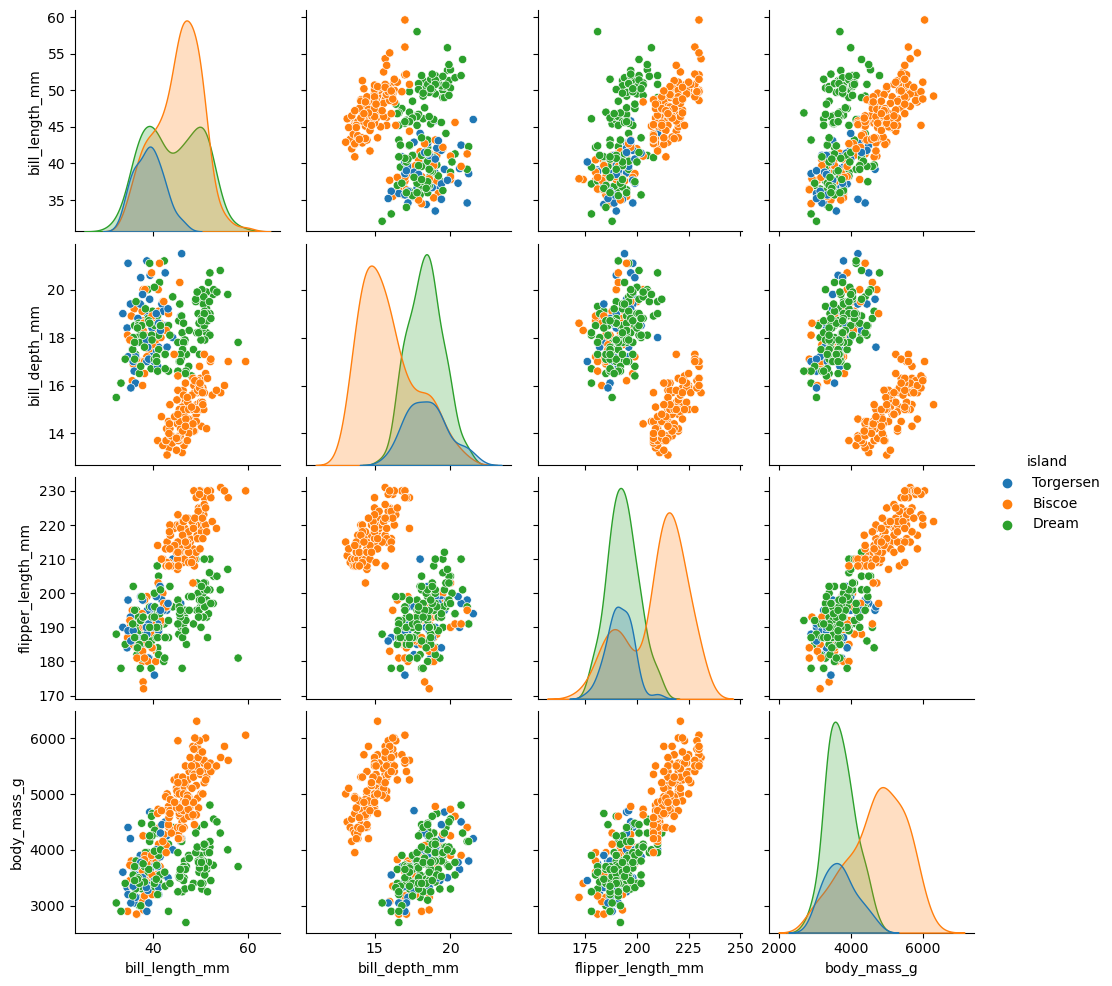

In [15]:
sns.pairplot(df, hue ='island')
plt.show()

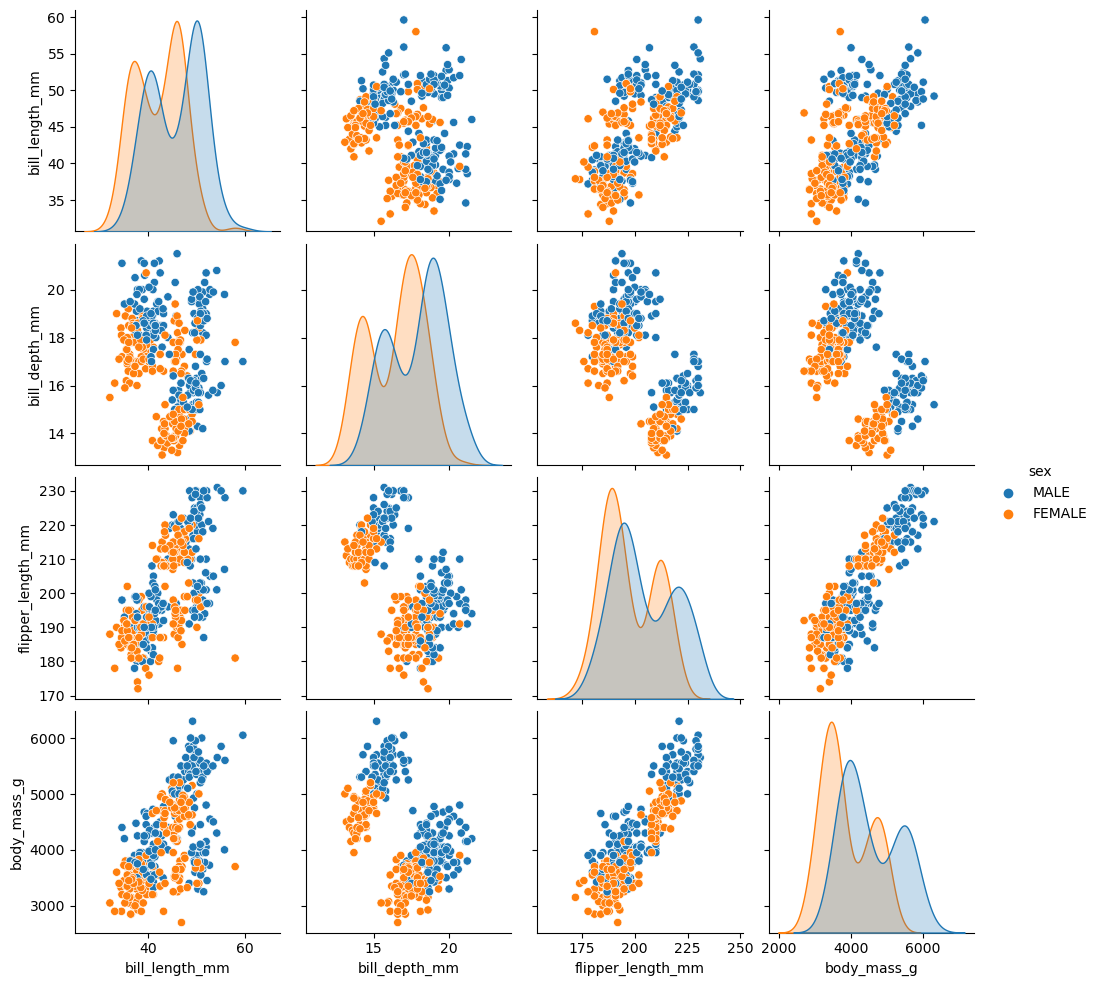

In [16]:
sns.pairplot(df, hue ='sex')
plt.show()

## Data Spilt

In [17]:
df['island'].replace(['Biscoe','Dream','Torgersen'],[0,1,2],inplace=True)
df['sex'].replace(['MALE','FEMALE'],[0,1],inplace=True)
df['species'].replace(['Adelie','Gentoo','Chinstrap'],[0,1,2],inplace=True)

X = df.loc[:,['island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','sex']].values
y = df.loc[:,['species']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, shuffle=True)

print(f"# of training data : {len(y_train)}")
print(f"# of test data     : {len(y_test)}")

Feature_names = df.loc[:,['island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g','sex']].columns
Target_name   = ['Adelie',"Chinstrap","Gentoo"]


# of training data : 249
# of test data     : 84


---

### Desicion Tree
---

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

------------------------------
max_depth= 4
Least node sizes= 2
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9285714285714286


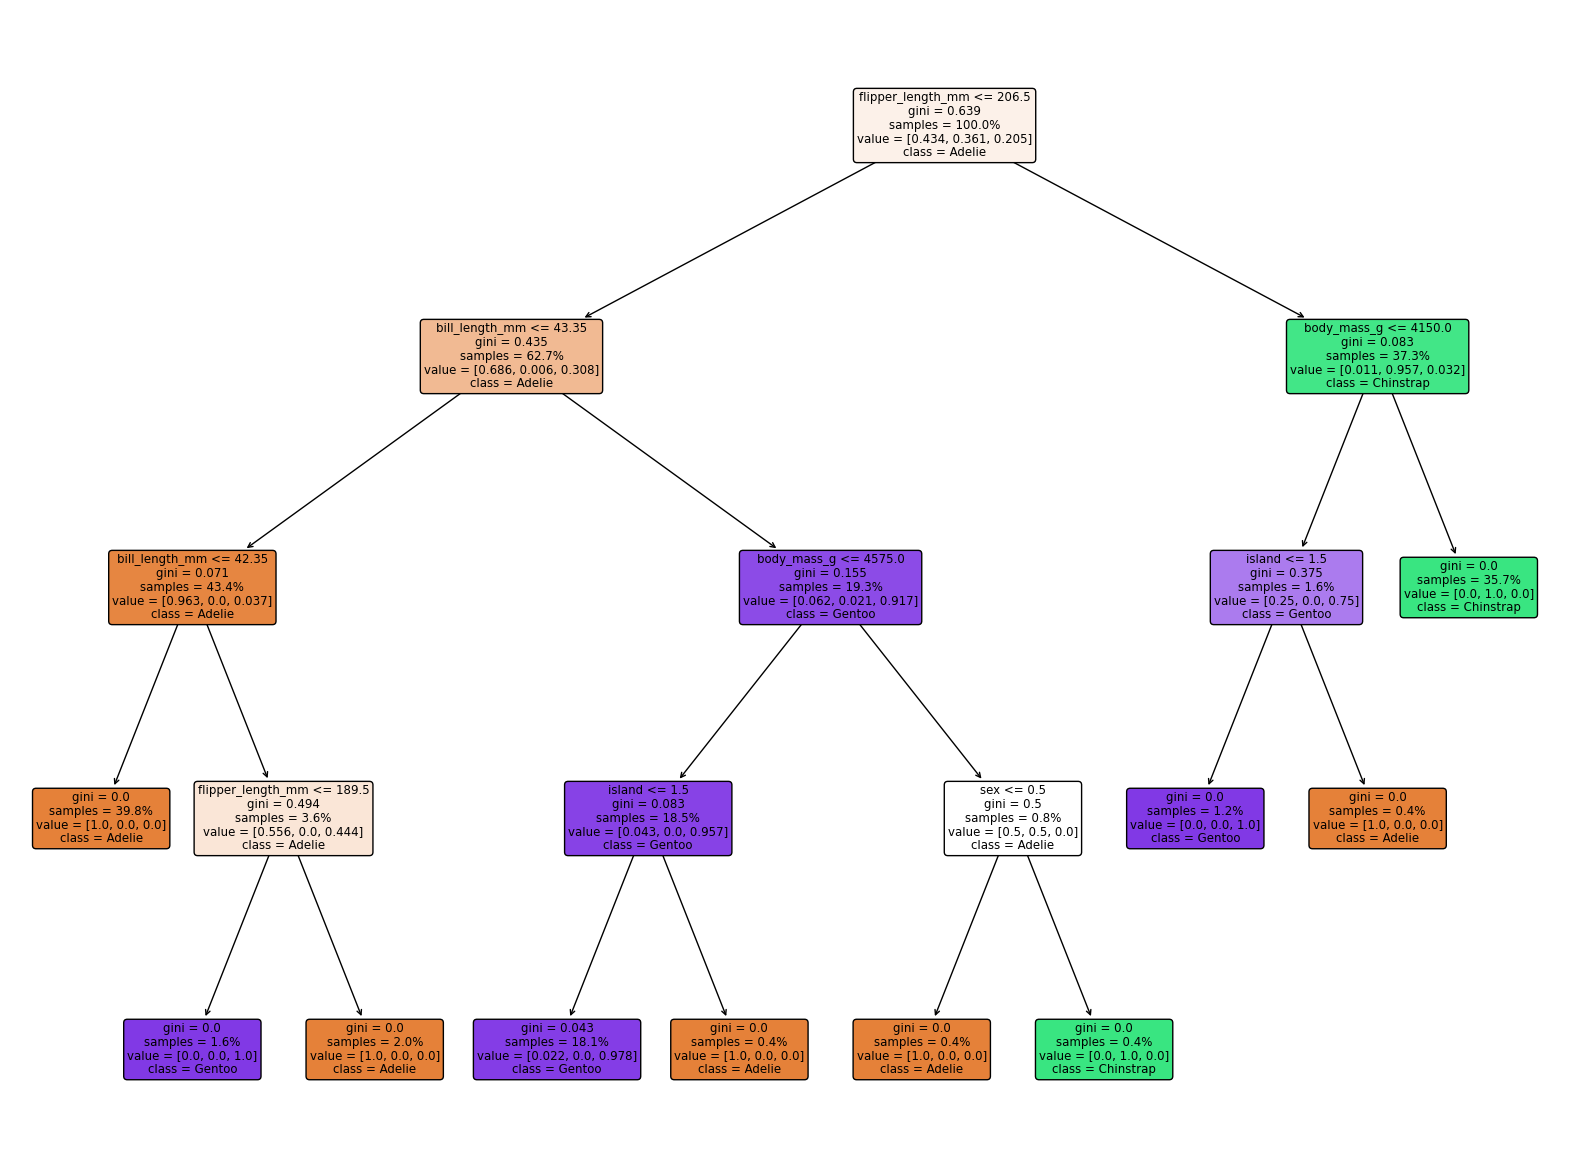

------------------------------
max_depth= 4
Least node sizes= 3
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9761904761904762


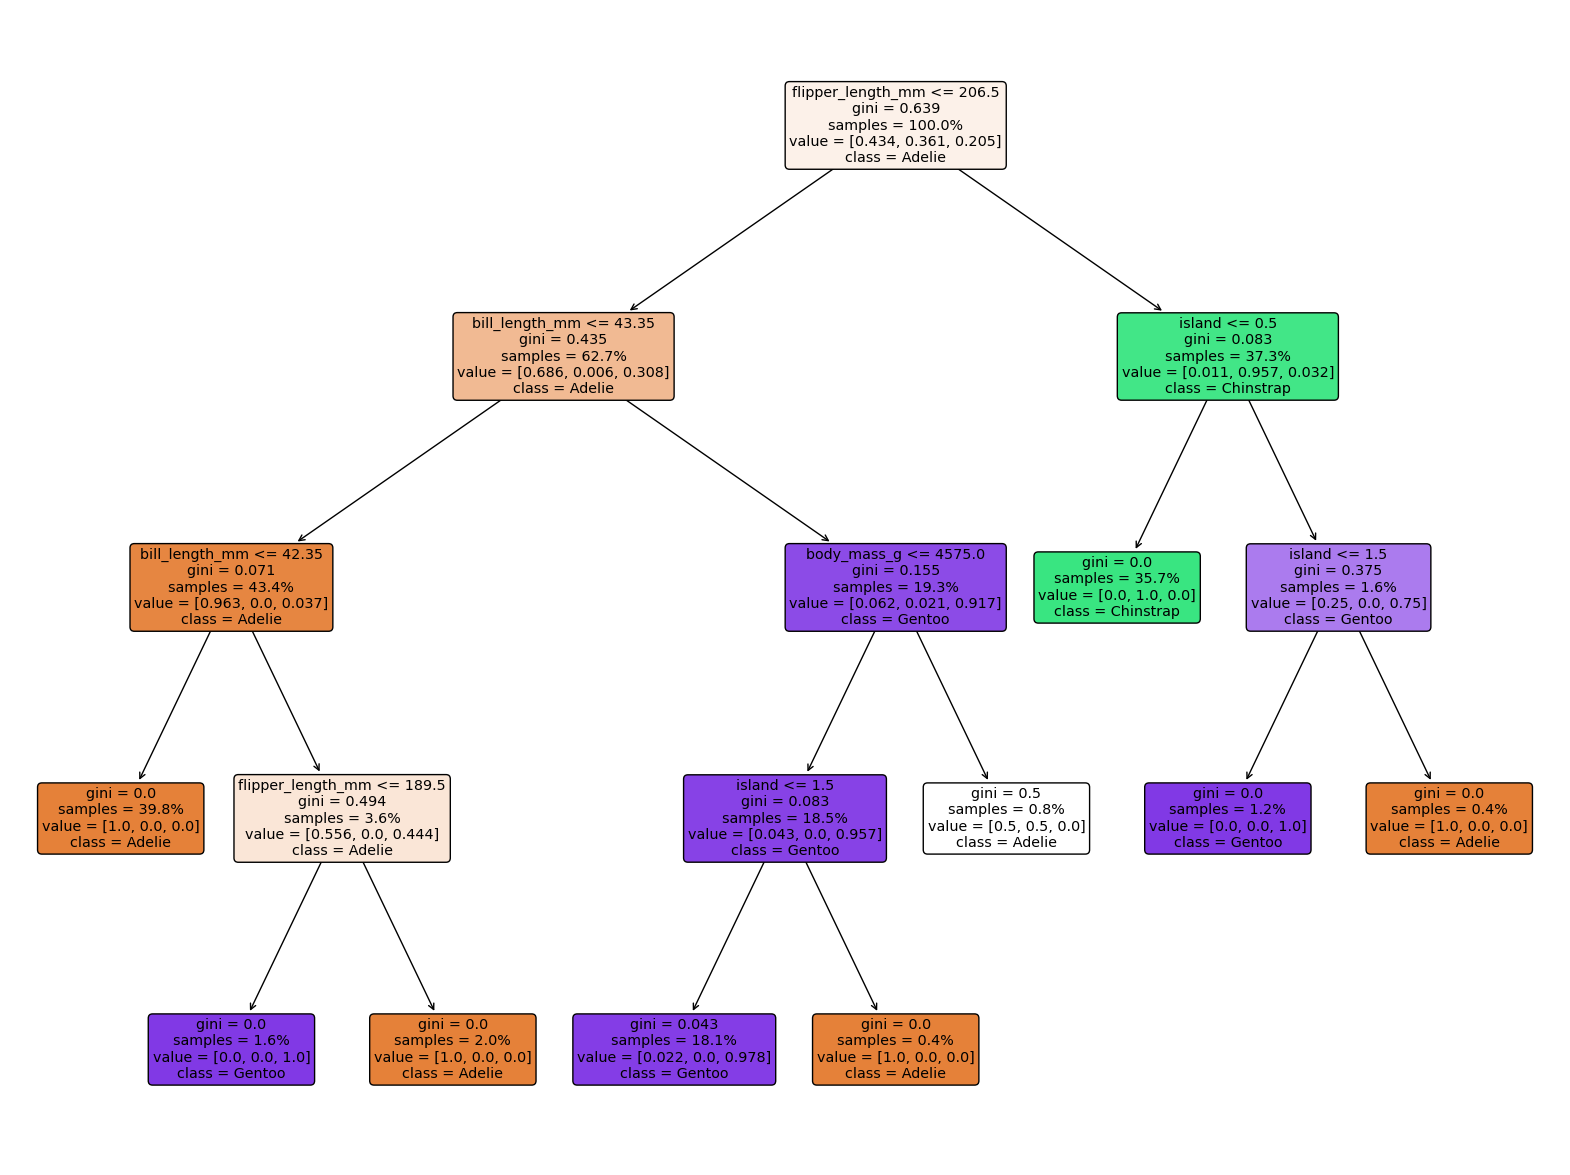

------------------------------
max_depth= 4
Least node sizes= 4
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9761904761904762


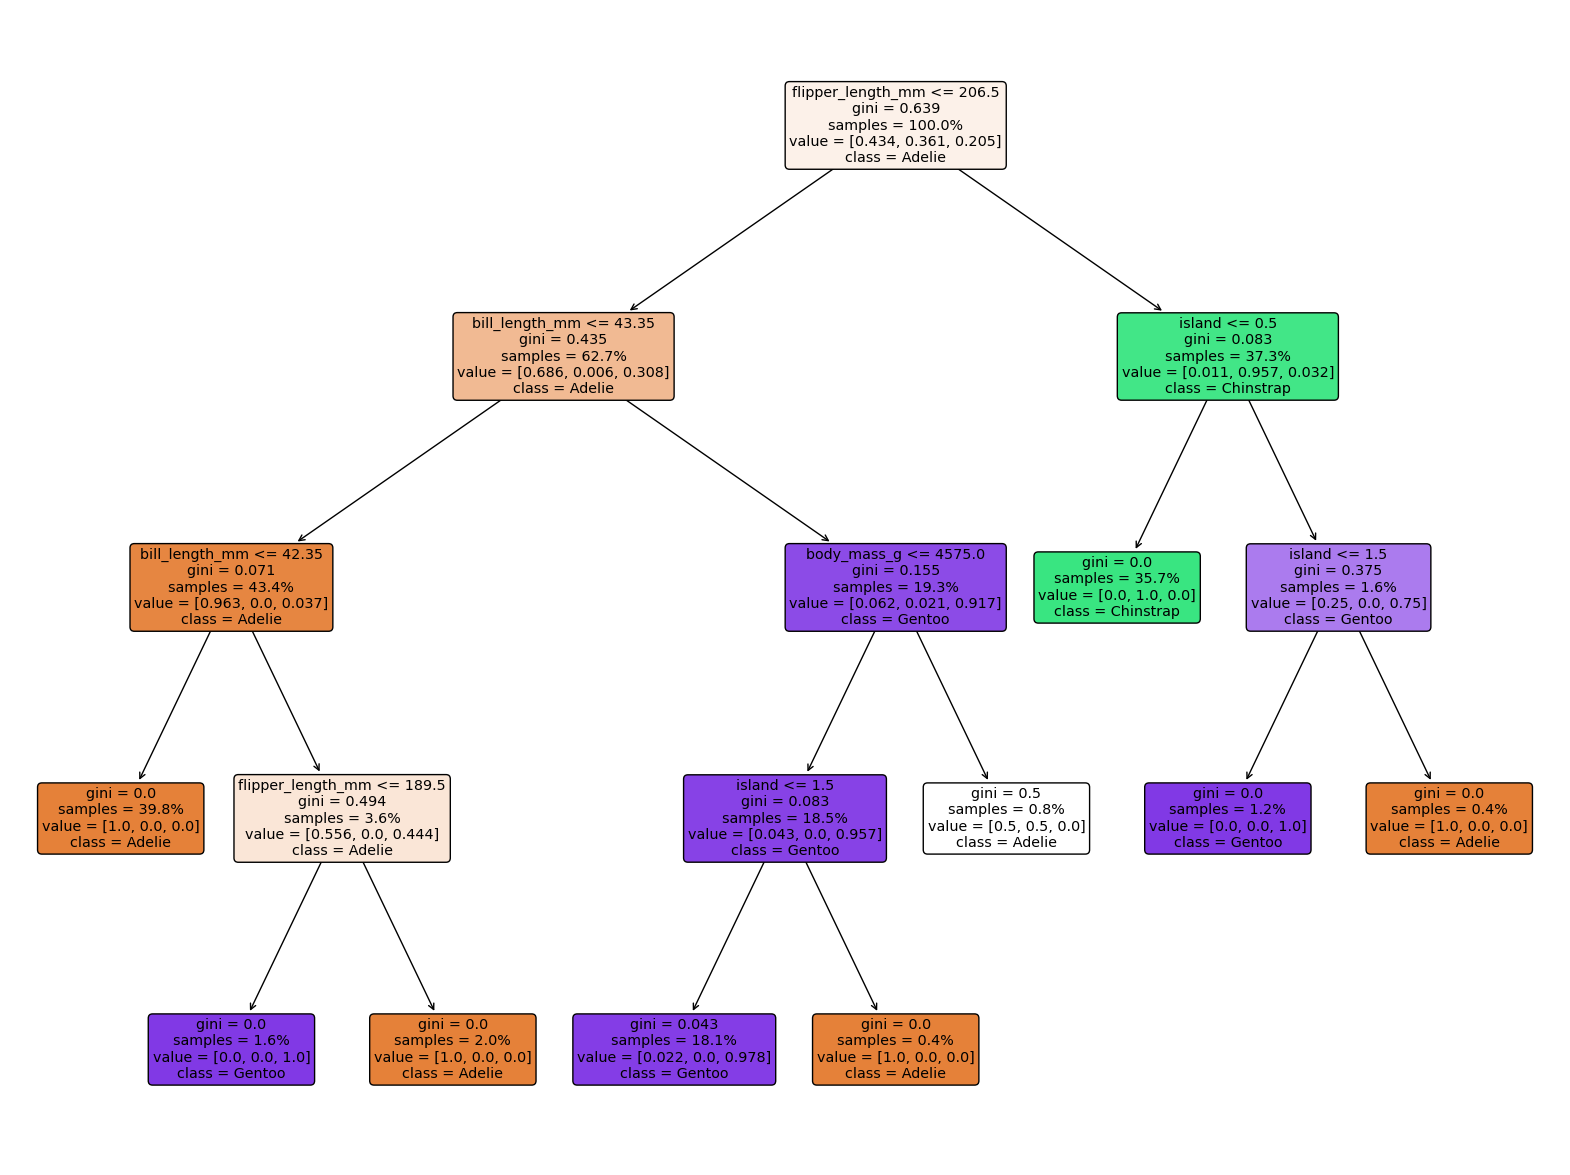

------------------------------
max_depth= 5
Least node sizes= 2
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9285714285714286


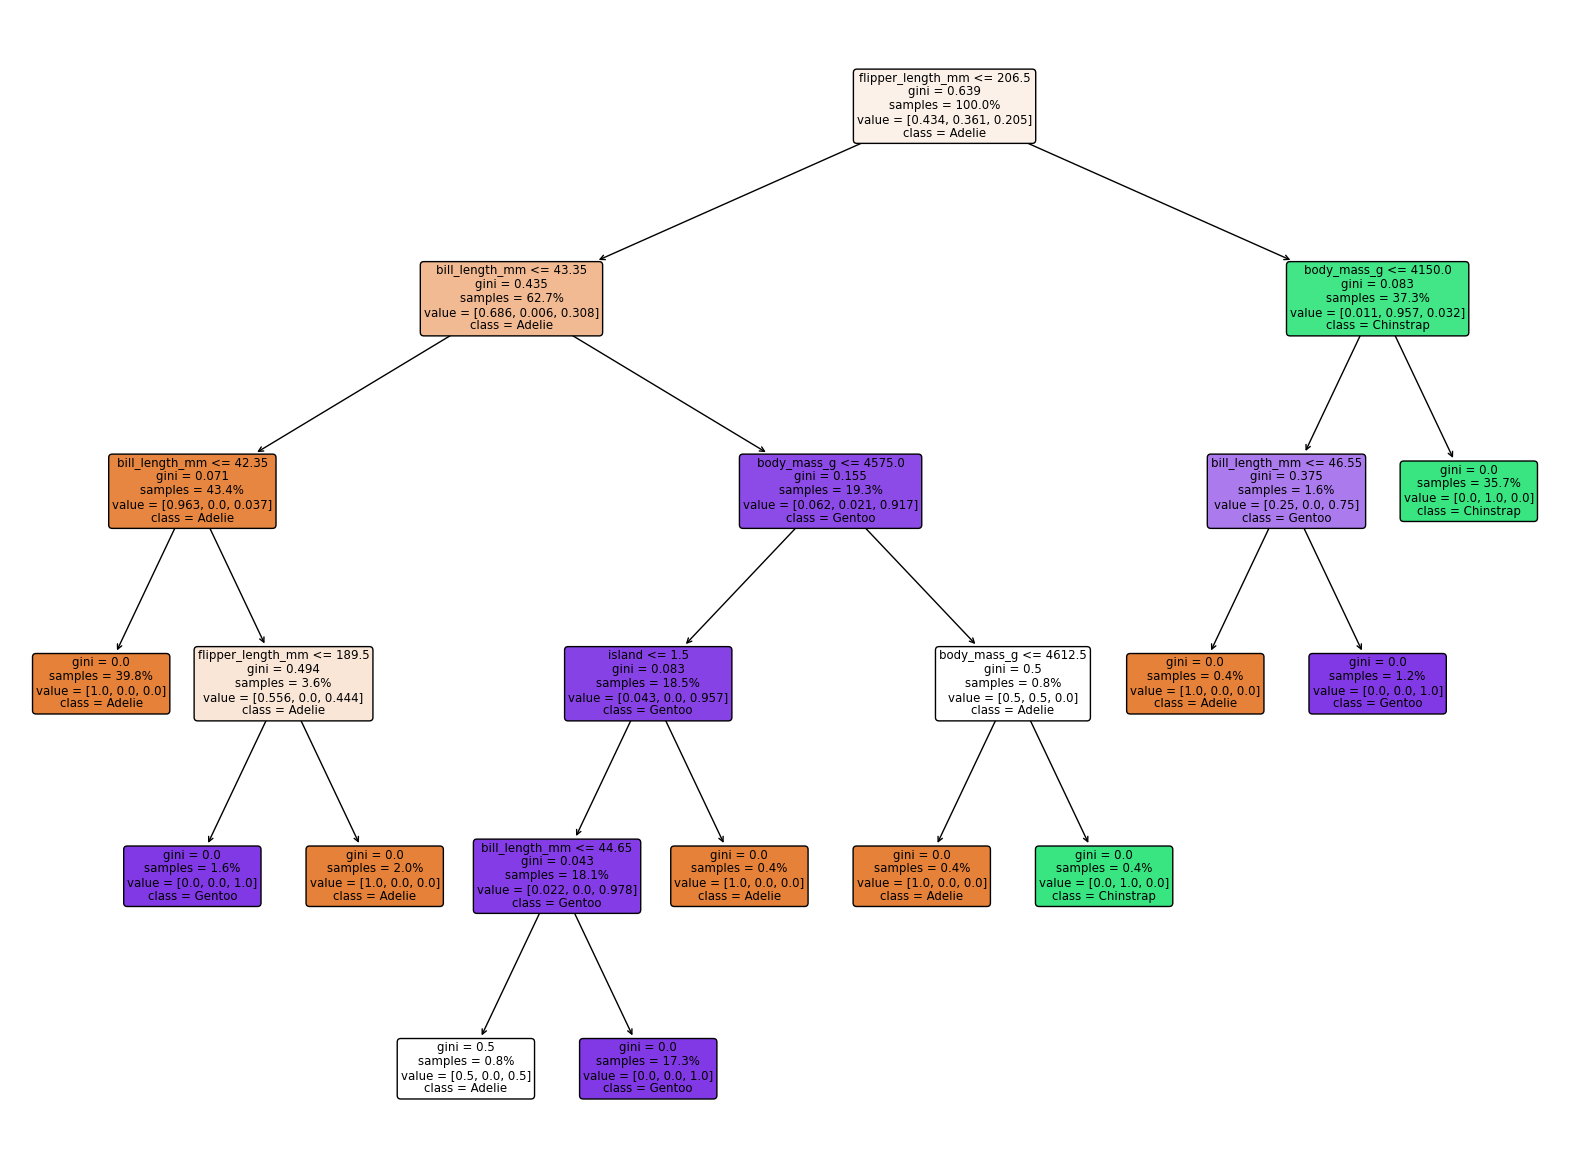

------------------------------
max_depth= 5
Least node sizes= 3
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9285714285714286


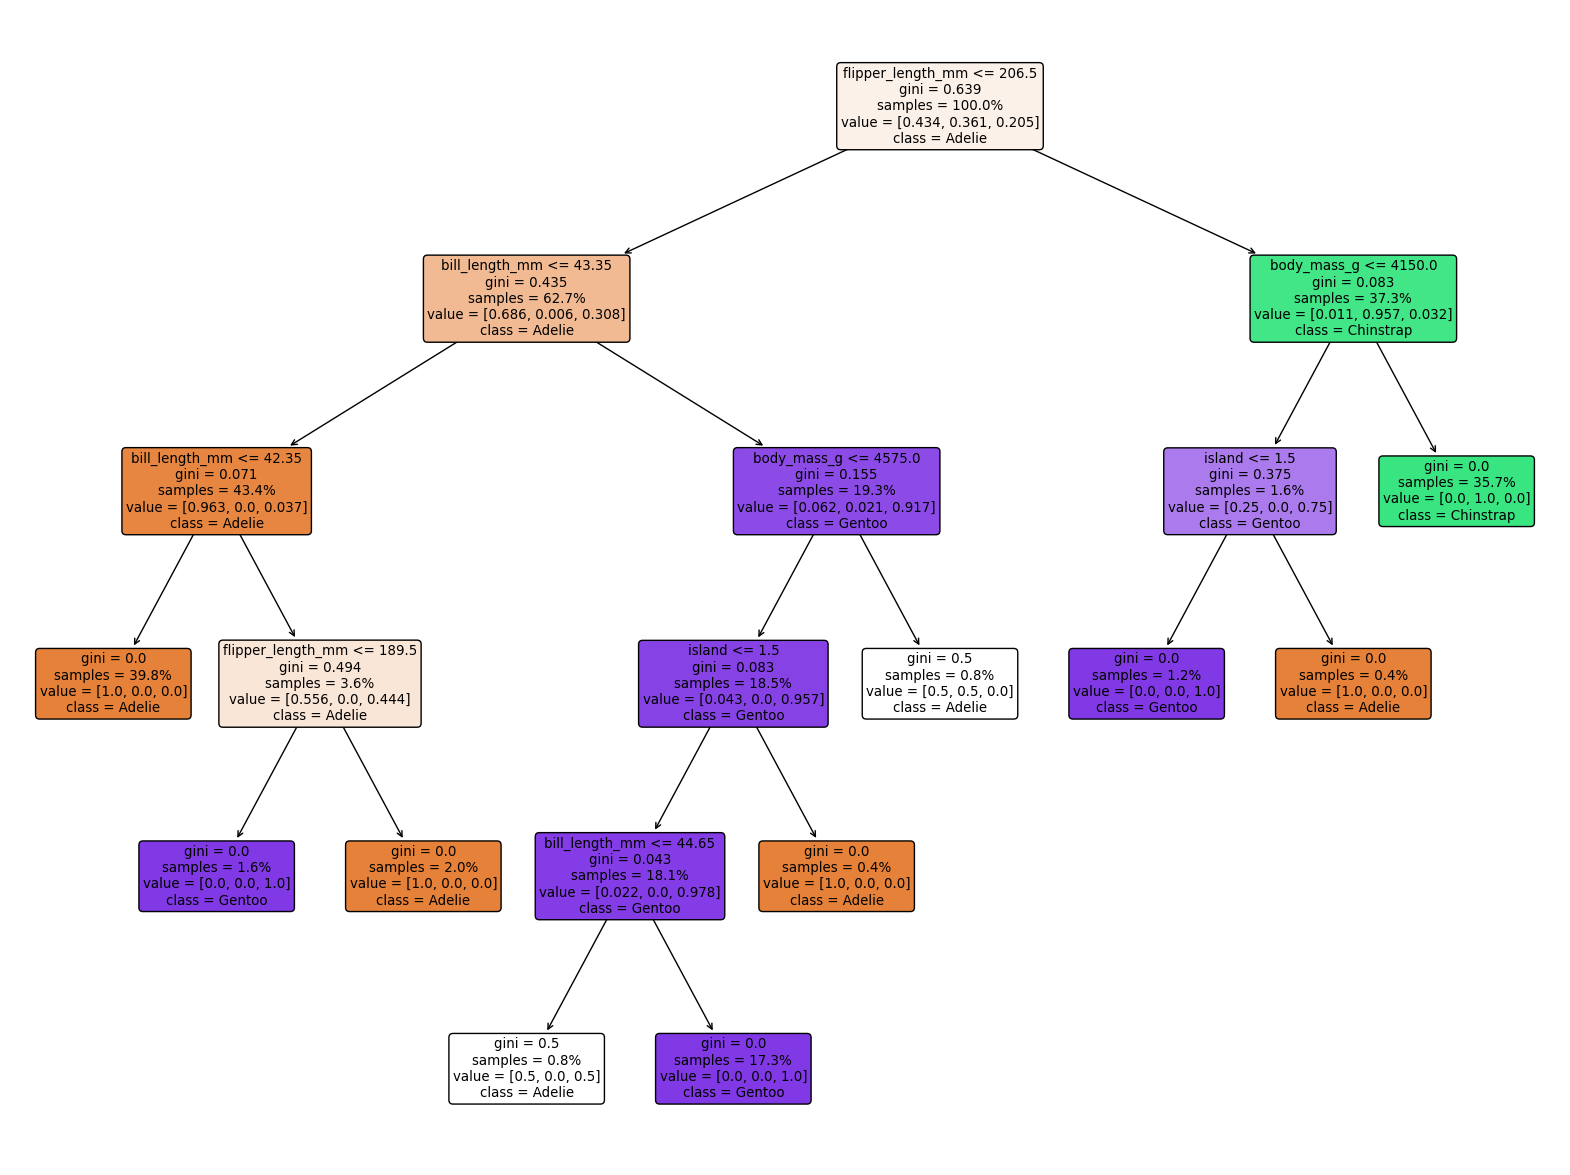

------------------------------
max_depth= 5
Least node sizes= 4
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9285714285714286


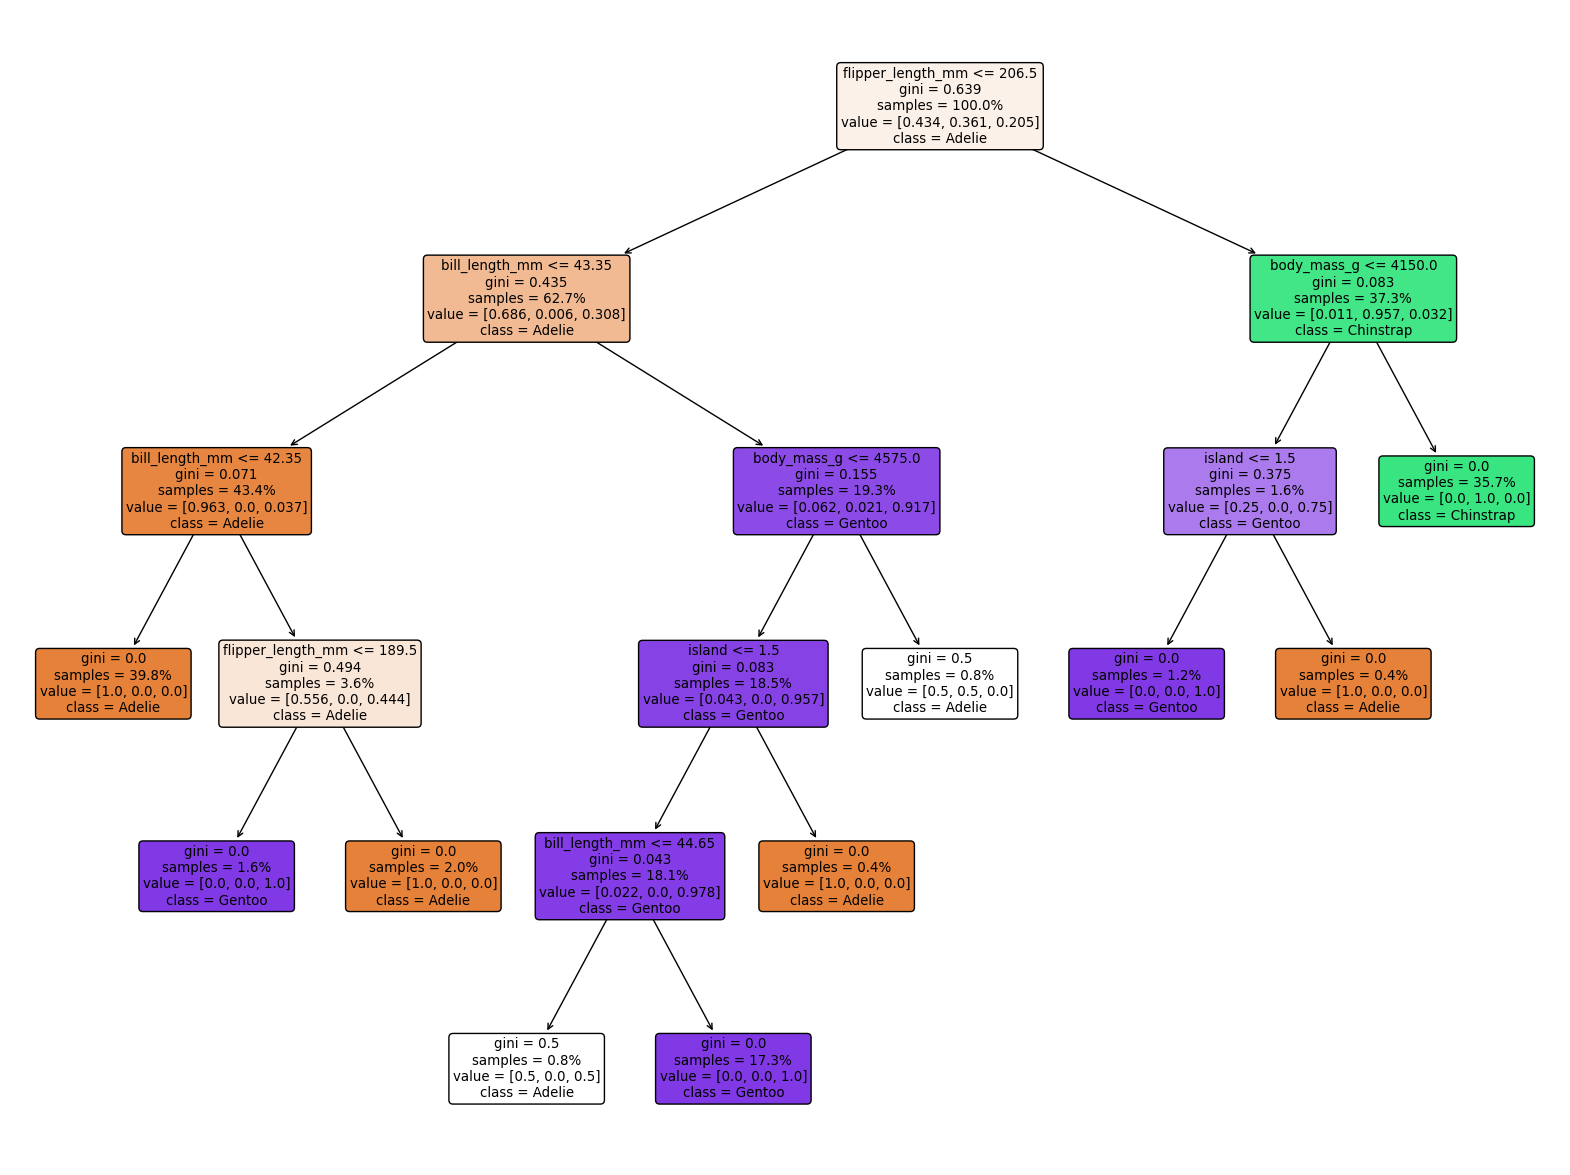

------------------------------
max_depth= 6
Least node sizes= 2
Train Accuracy : 1.0
Test  Accuracy : 0.9761904761904762


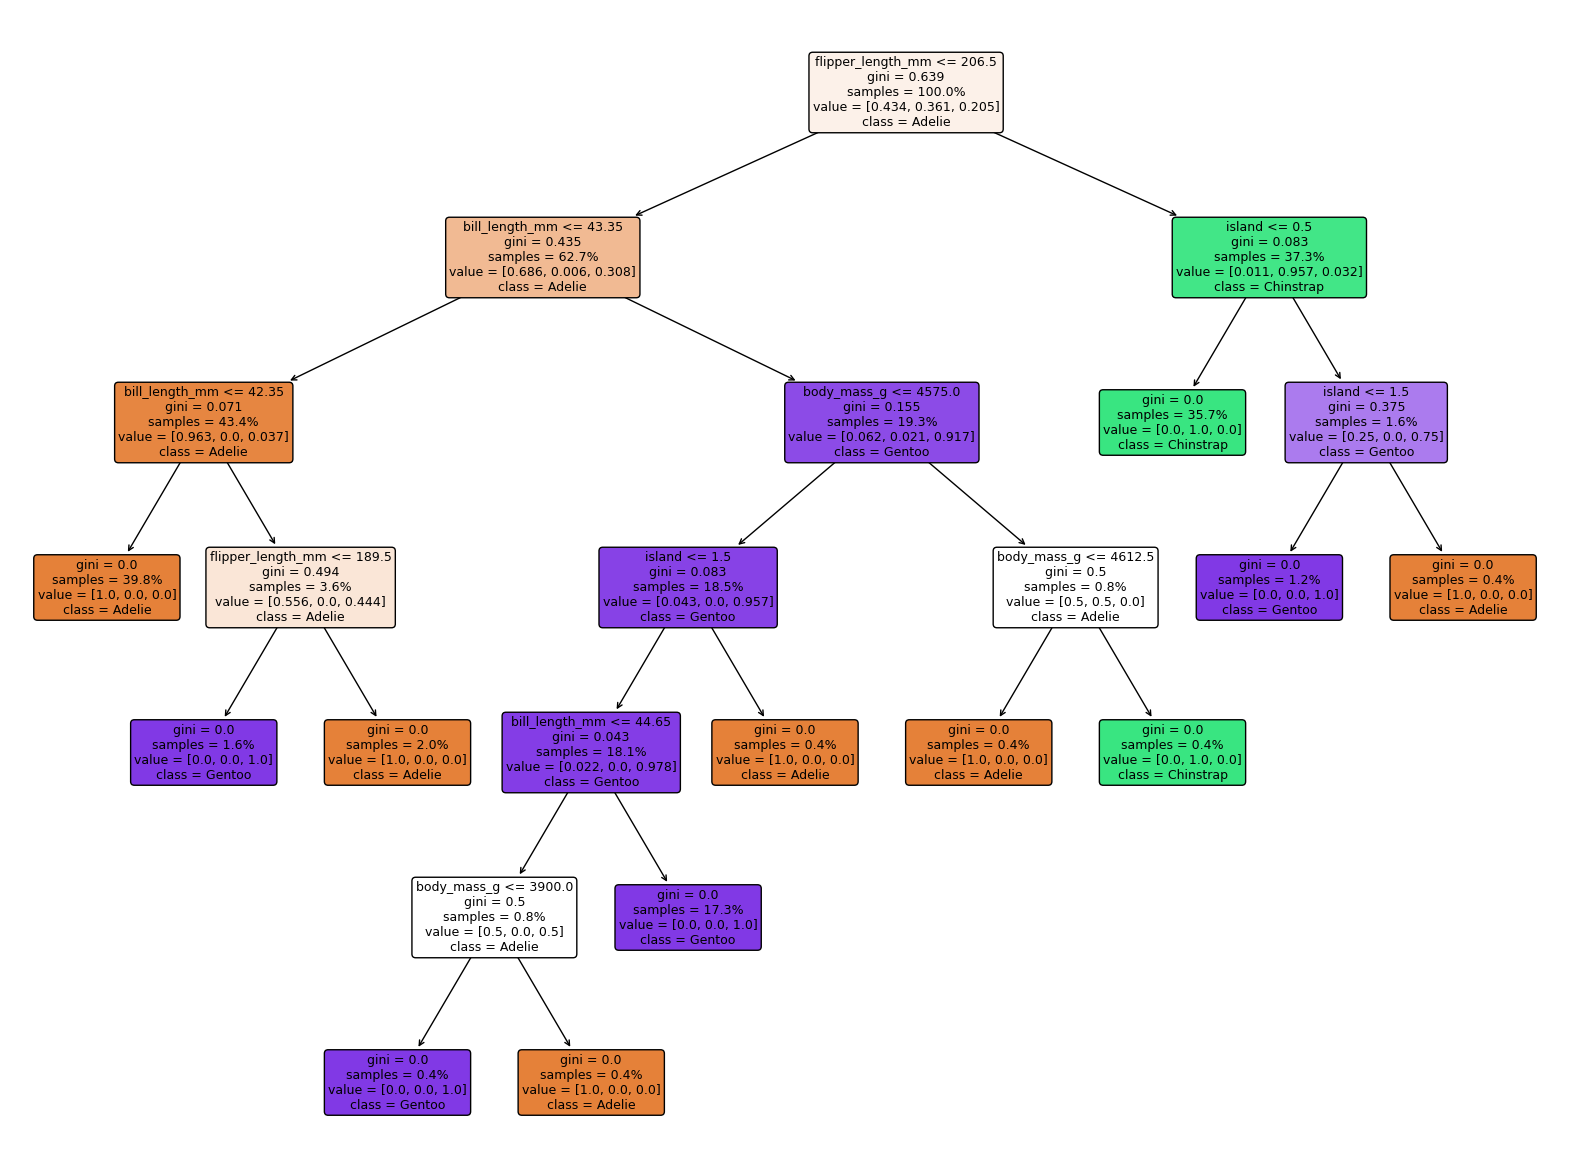

------------------------------
max_depth= 6
Least node sizes= 3
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9285714285714286


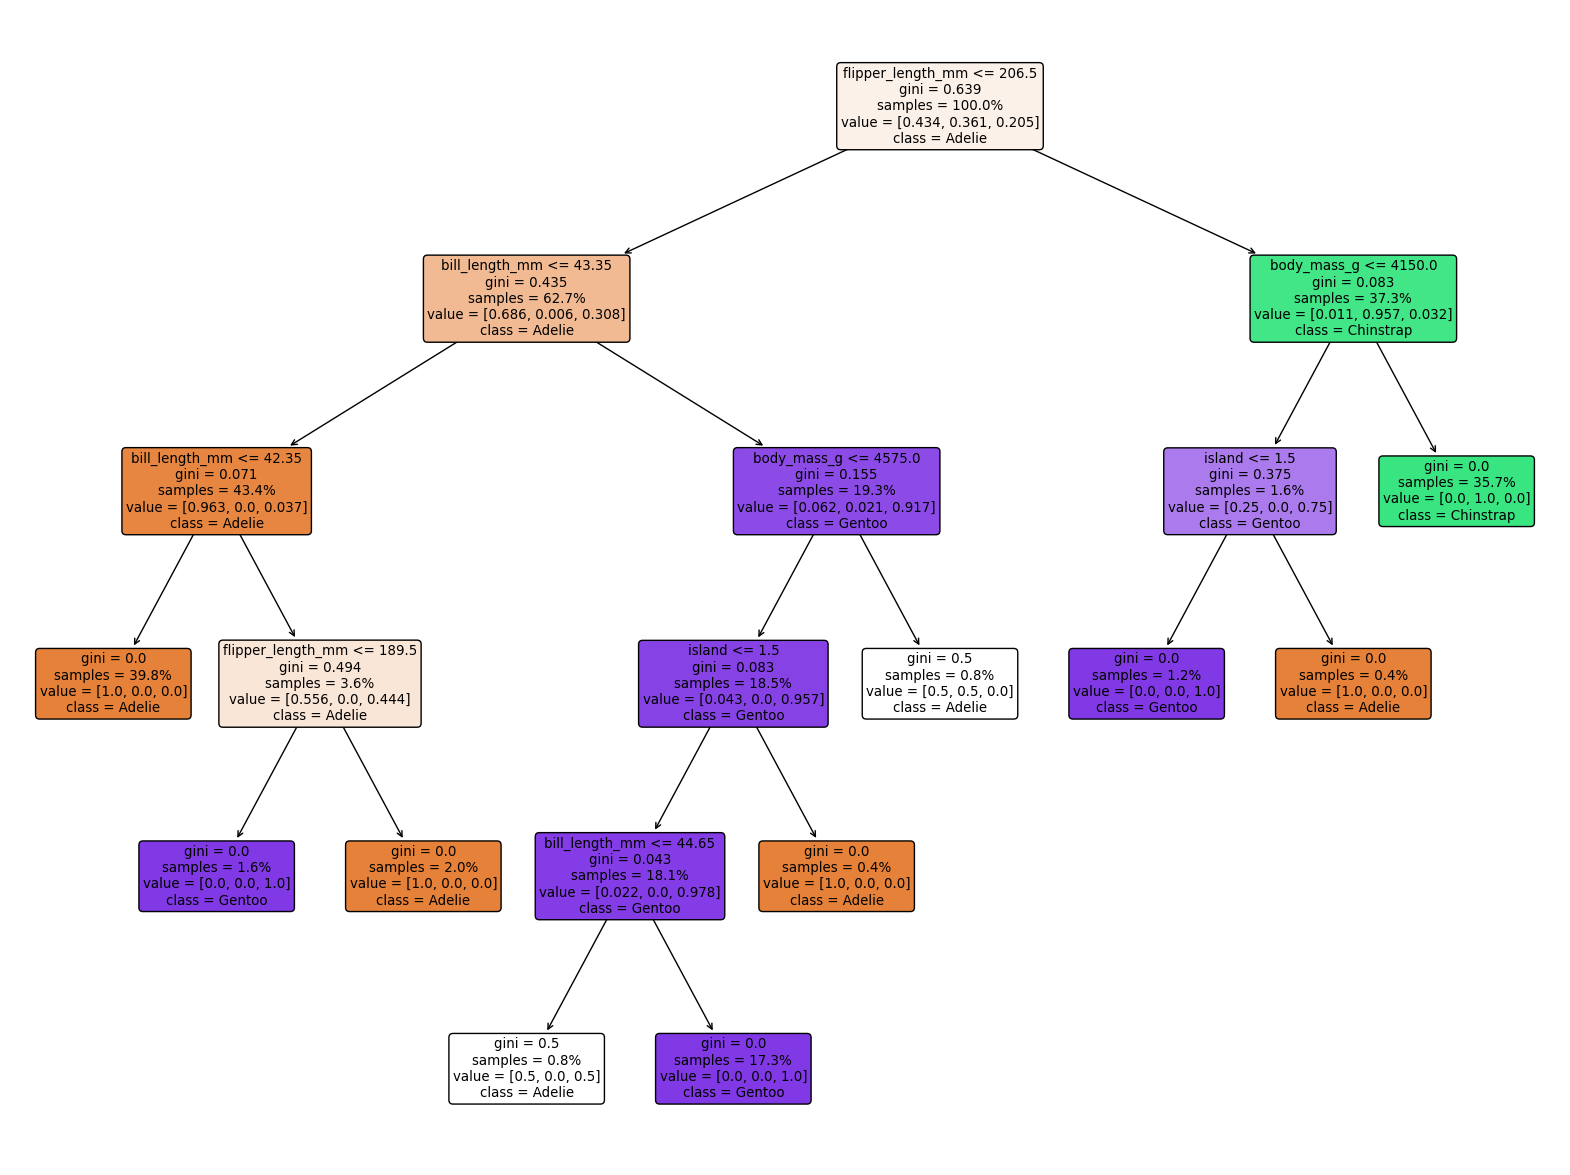

------------------------------
max_depth= 6
Least node sizes= 4
Train Accuracy : 0.9919678714859438
Test  Accuracy : 0.9285714285714286


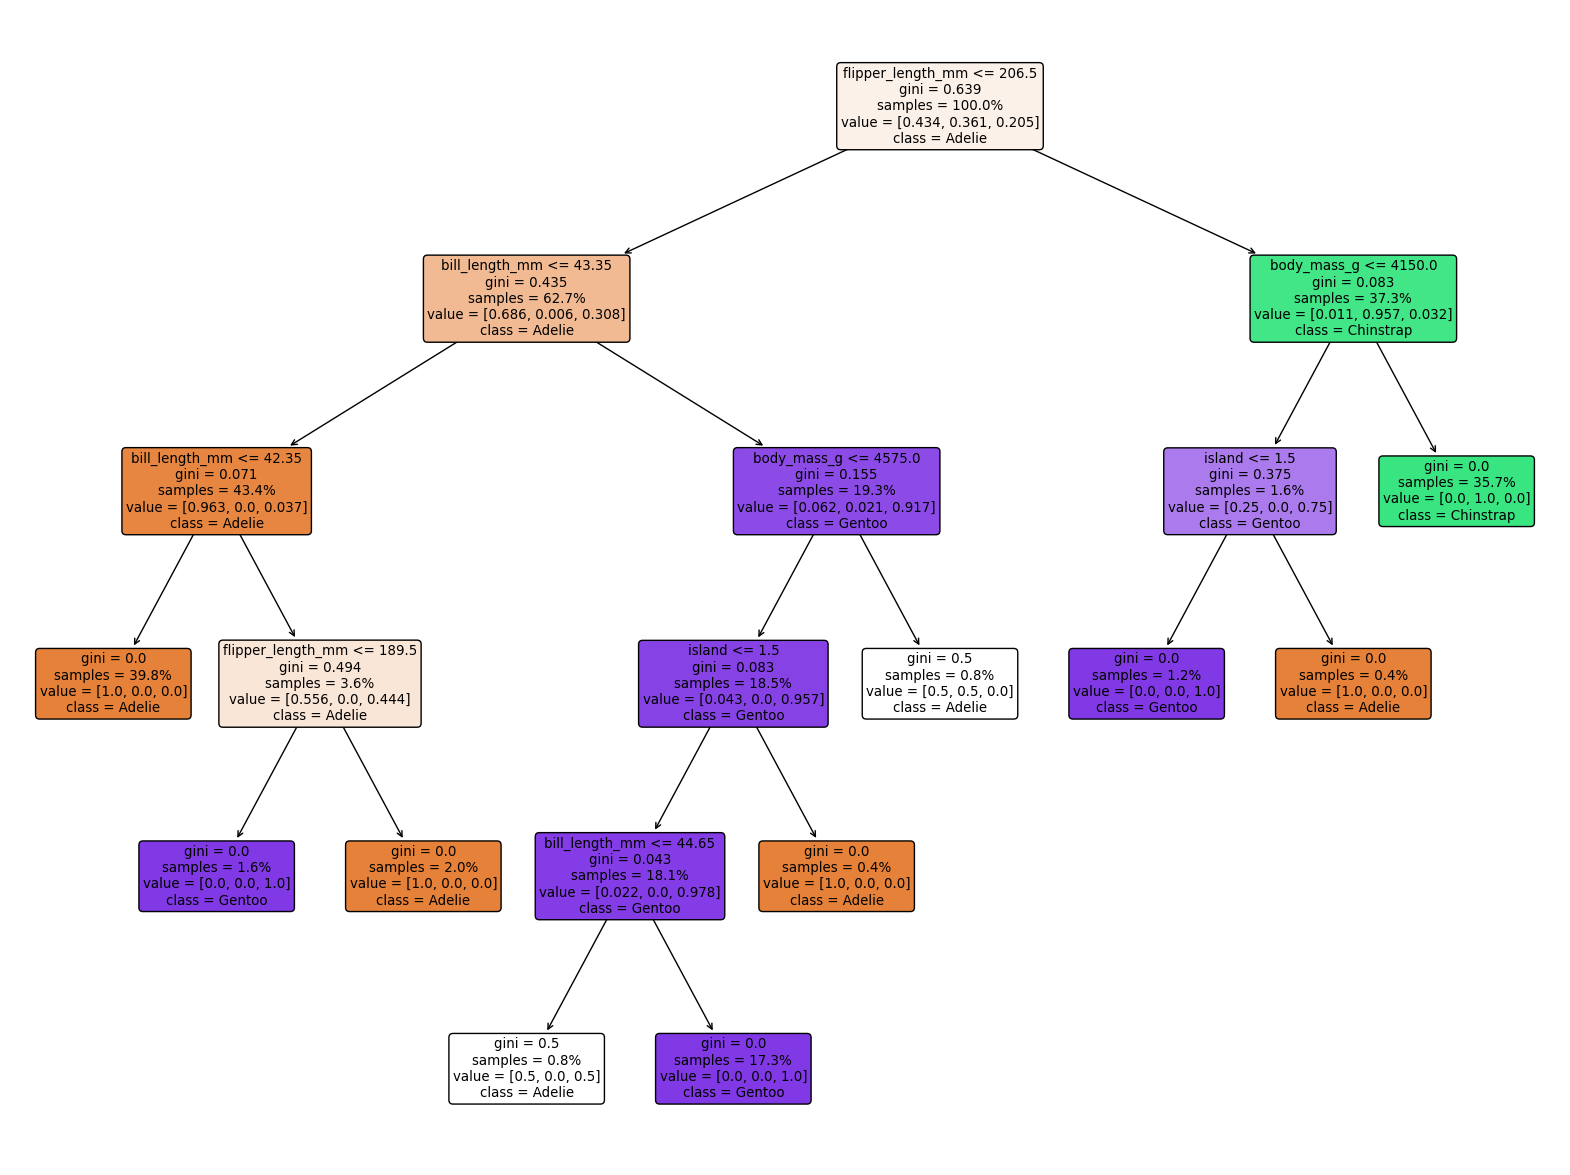

In [19]:

#Input parameter matrix express through for loop
#Nine different situations
for max_depth in [4,5,6]:
    for min_samples_leaf in [2,3,4]:
        #Least node sizes == min_samples_leaf here
        clf = DecisionTreeClassifier(random_state=2,
                             min_samples_split=min_samples_leaf,
                             max_depth=max_depth
                            )
        
        clf.fit(X_train, y_train)

        print("------------------------------")
        print("max_depth=",max_depth)
        print("Least node sizes=",min_samples_leaf)
        print(f"Train Accuracy : {clf.score(X_train, y_train)}")
        print(f"Test  Accuracy : {clf.score(X_test, y_test)}")
        
        #Plot the desicion tree with specific feature_names and class_names
        plt.figure(figsize=(20,15))
        tree = plot_tree(clf,feature_names=Feature_names,
                         class_names=Target_name,
                         rounded=True,filled=True,proportion=True)
        plt.show()

---

### Bagging of trees
---

In [20]:
#Input parameter matrix express through for loop
#Nine different situations
for max_depth in [5,10,15]:
    for n_estimators in [5,10,15]:
        #The number of trees == n_estimators here
        dt = DecisionTreeClassifier(max_depth=max_depth)

        clf = BaggingClassifier(base_estimator=dt,
                        n_estimators=n_estimators,
                        random_state=2,
                       )

        clf.fit(X_train, y_train)

        print("------------------------------")
        print("max_depth=",max_depth)
        print("The number of trees=",n_estimators)
        print(f"Train Accuracy : {clf.score(X_train, y_train)}")
        print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

------------------------------
max_depth= 5
The number of trees= 5
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9523809523809523
------------------------------
max_depth= 5
The number of trees= 10
Train Accuracy : 1.0
Test  Accuracy : 0.9761904761904762
------------------------------
max_depth= 5
The number of trees= 15
Train Accuracy : 1.0
Test  Accuracy : 0.9761904761904762
------------------------------
max_depth= 10
The number of trees= 5
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9523809523809523
------------------------------
max_depth= 10
The number of trees= 10
Train Accuracy : 1.0
Test  Accuracy : 0.9761904761904762
------------------------------
max_depth= 10
The number of trees= 15
Train Accuracy : 1.0
Test  Accuracy : 0.9642857142857143
------------------------------
max_depth= 15
The number of trees= 5
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9523809523809523
------------------------------
max_depth= 15
The number of trees= 10
Train Accu

---

### Random forests
---

In [21]:
#Input parameter matrix express through for loop
#Nine different situations
for max_features in [1,3,5]:
    for n_estimators in [2,4,6]:
        #The number of trees == n_estimators here
        #The number of candidate attributes == max_features here
        clf = RandomForestClassifier(random_state=2,
                             n_estimators=n_estimators,
                             max_features=max_features
                            )

        clf.fit(X_train, y_train)

        print("------------------------------")
        print("max_features=",max_features)
        print("n_estimators=",n_estimators)
        print(f"Train Accuracy : {clf.score(X_train, y_train)}")
        print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

------------------------------
max_features= 1
n_estimators= 2
Train Accuracy : 0.9678714859437751
Test  Accuracy : 0.9761904761904762
------------------------------
max_features= 1
n_estimators= 4
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9880952380952381
------------------------------
max_features= 1
n_estimators= 6
Train Accuracy : 1.0
Test  Accuracy : 0.9880952380952381
------------------------------
max_features= 3
n_estimators= 2
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9761904761904762
------------------------------
max_features= 3
n_estimators= 4
Train Accuracy : 1.0
Test  Accuracy : 0.9761904761904762
------------------------------
max_features= 3
n_estimators= 6
Train Accuracy : 1.0
Test  Accuracy : 0.9761904761904762
------------------------------
max_features= 5
n_estimators= 2
Train Accuracy : 0.9879518072289156
Test  Accuracy : 0.9761904761904762
------------------------------
max_features= 5
n_estimators= 4
Train Accuracy : 1.0
Test  Accuracy :

---

### Plot the curve of bias^2 with respect to different number of trees
---

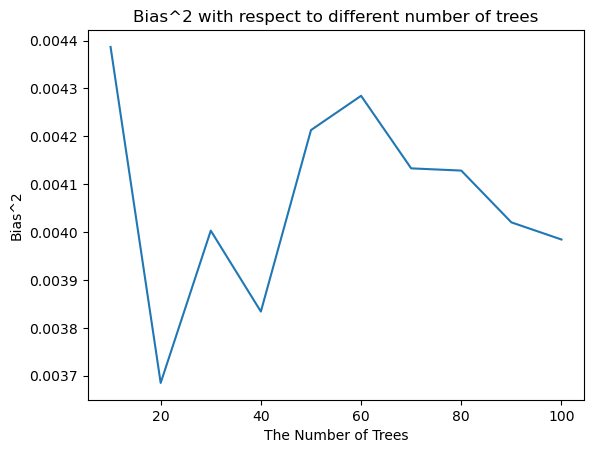

In [22]:
from mlxtend.evaluate import bias_variance_decomp
#I used to learn this from https://www.kaggle.com/code/anvima/bias-variance-decomposition-using-mlxtend
#You need to pip install mlxtend if you want to use bias_variance_decomp

Array_n_estimators = np.arange(10,110,10)
Dict_M_B_V = {}

for n_estimator in Array_n_estimators:
    RF_Classifier = RandomForestClassifier(n_estimators = n_estimator,
                                            random_state = 2)
    RF_Classifier.fit(X_train, y_train)

    Mean_Squared_Error, Bias, Variance = bias_variance_decomp(RF_Classifier, 
                                          X_train, y_train, X_test, y_test, 
                                          loss='mse', random_seed = 2)
    
    Dict_M_B_V[n_estimator] = {"Mean_Squared_Error":Mean_Squared_Error, "Bias":Bias, "Variance":Variance}    
    
df_M_B_V = pd.DataFrame(Dict_M_B_V)
df_Result = df_M_B_V.T
df_Result['Bias'] = df_Result['Bias'].apply(lambda x: x**2)

#Plot the picture
plt.ylabel("Bias^2")
plt.xlabel("The Number of Trees")
plt.title("Bias^2 with respect to different number of trees")
plt.plot(df_Result.index, df_Result['Bias'].values)
plt.show()

---

### Plot the curve of variance with respect to different number of trees
---

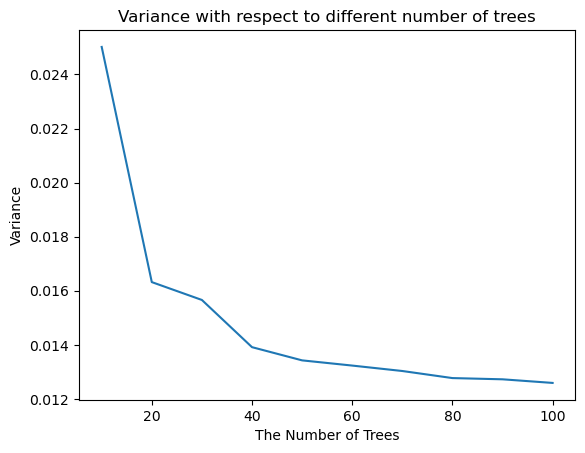

In [23]:
plt.title("Variance with respect to different number of trees")
plt.ylabel("Variance")
plt.xlabel("The Number of Trees")
plt.plot(df_Result.index, df_Result['Variance'].values)
plt.show()